In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)

In [2]:
ps = pd.read_csv('../data/post_secondary.csv')

Reading in a version of the dataset that has not been train/test split for exporatory analysis.

In [3]:
ps.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
ps.head()

literacy_home  risk_factors  aspired_occ_b  math_b  reading_b  math_conf_b  \
0            0.0           2.0           -1.0   52.11      59.53       -1.118   
1            3.0           0.0            9.0   57.65      56.70        1.533   
2            2.0           NaN           10.0   66.44      64.46       -0.154   
3            1.0           NaN           10.0   44.68      48.69        1.030   
4            1.0           2.0           16.0   40.57      33.53        0.121   

   verbal_confidence  writing  sports  by_xcurr  homework  hedonics_b  \
0             -0.633    1.191     0.0       1.0       7.0         NaN   
1              0.331    1.191     0.0       3.0       5.0         4.0   
2             -0.933    0.996     0.0       2.0       NaN         1.0   
3              1.146   -0.137     1.0       0.0      11.0         NaN   
4              0.143   -0.435     0.0       0.0      10.0         4.0   

   hours_working_b  edu_confidence  aspired_occ_1  math_1  math_status_1  \
0              6.0             3.0            7.0   49.60            5.0   
1              0.0             8.0           10.0   60.64            6.0   
2              0.0             6.0            NaN   64.26            6.0   
3              0.0             6.0           -1.0   45.59            4.0   
4              3.0             7.0           16.0   38.79            5.0   

   ps_step_1  f1_xcurr  hours_working_1  hedonics_1  math_conf_1  hs_ac_load  \
0        2.0       1.0              6.0         3.0       -0.258        31.0   
1        5.0       2.0              1.0         2.0        0.528        31.0   
2        5.0       2.0              0.0         2.0       -0.215        30.0   
3        4.0       1.0              5.0         NaN        0.238        32.0   
4        5.0       0.0              6.0         1.0        1.024        32.0   

   hs_gpa  any_ps  ps_level  graduated_Y  time_to_grad  edu_achievment  \
0     2.0     1.0       2.0          0.0           NaN             3.0   
1     4.0     1.0       1.0          1.0          44.0            10.0   
2     4.0     1.0       1.0          1.0          45.0             6.0   
3     4.0     1.0       2.0          0.0           NaN             4.0   
4     4.0     1.0       2.0          0.0           NaN             4.0   

   expected_edu  wages_yr  effort  testing  v_facility  m_facility  \
0           1.0    4000.0   217.0   161.24       59.53      248.00   
1           2.0    3000.0   155.0   174.99      226.80      363.84   
2           2.0   37000.0     NaN   195.16      193.38      385.56   
3           3.0    1500.0   352.0   138.96       97.38      182.36   
4           3.0   48000.0   320.0   112.89       67.06      193.95   

   academic_p  iq_by_concientiousness  delinquency  wages_cont  
0       434.0                11686.14          NaN    644960.0  
1       620.0                21263.04          0.0    524970.0  
2         NaN                     NaN          NaN   7220920.0  
3      1408.0                12028.82          NaN    208440.0  
4      1280.0                10962.42         10.0   5418720.0

Reading in the data and defining functions to do the process the data for exploration

In [5]:
def KNNimpute_DF(df):
    #filling in missing values with knn imputer
    imputer_knn = KNNImputer(n_neighbors = 10)
    imputer_knn.fit(df)

    x = imputer_knn.transform(df)
    
    #casting the numpy array to dataframe
    df = pd.DataFrame(x)
    return df

In [6]:
def round_ordinals(x):
    ordinal_feature_list = ['literacy_home','risk_factors','aspired_occ_b','sports','by_xcurr',
                    'homework','hedonics_b','hours_working_b','edu_confidence',
                    'aspired_occ_1','math_status_1','hs_gpa','f1_xcurr','hours_working_1',
                    'hedonics_1','hs_ac_load', 'testing','academic_p','graduated_Y']
    
    for k in ordinal_feature_list:
        x[k] = x.loc[:,k].apply(round)
    return x

In [7]:
def create_exploratory_set(df):   
    z = KNNimpute_DF(df)  
    rename_list = list(df.columns)
    z.columns = rename_list
    round_ordinals(z)    
    return z

creating exporatory dataset.  this dataset is distinct from the training sets as it has not been split and therefore has all 9901 observations in one set.

In [8]:
exp = create_exploratory_set(ps)

In [9]:
exp.shape

(9901, 39)

All 9900 observations for exploration.

In [10]:
exp.describe()

literacy_home  risk_factors  aspired_occ_b       math_b    reading_b  \
count    9901.000000   9901.000000    9901.000000  9901.000000  9901.000000   
mean        2.303909      0.785577       6.384103    53.175392    52.962878   
std         0.802052      0.888068       5.154152     9.315861     9.339740   
min         0.000000      0.000000      -1.000000    19.380000    24.910000   
25%         2.000000      0.000000      -1.000000    47.030000    46.600000   
50%         2.000000      1.000000       9.000000    53.540000    53.370000   
75%         3.000000      1.000000      10.000000    59.640000    59.530000   
max         3.000000      5.000000      17.000000    86.680000    78.760000   

       math_conf_b  verbal_confidence      writing       sports     by_xcurr  \
count  9901.000000        9901.000000  9901.000000  9901.000000  9901.000000   
mean      0.096449           0.092587     0.255196     1.140895     1.157964   
std       0.866505           0.841037     0.867554     1.215325     1.318284   
min      -1.831000          -2.197000    -1.847000     0.000000     0.000000   
25%      -0.575000          -0.453000    -0.239100     0.000000     0.000000   
50%       0.047100           0.098100     0.241000     1.000000     1.000000   
75%       0.571000           0.585000     0.812000     2.000000     2.000000   
max       1.772000           1.596000     1.951000     7.000000     8.000000   

          homework   hedonics_b  hours_working_b  edu_confidence  \
count  9901.000000  9901.000000      9901.000000     9901.000000   
mean     10.464297     3.326028         1.010908        6.498334   
std       7.199331     2.132566         1.619166        1.368152   
min       0.000000     0.000000         0.000000        1.000000   
25%       5.000000     2.000000         0.000000        6.000000   
50%       9.000000     3.000000         0.000000        6.000000   
75%      14.000000     4.000000         2.000000        7.000000   
max      45.000000     8.000000         9.000000        9.000000   

       aspired_occ_1       math_1  math_status_1    ps_step_1     f1_xcurr  \
count    9901.000000  9901.000000    9901.000000  9901.000000  9901.000000   
mean        6.960307    52.537816       5.309666     4.608262     2.409656   
std         5.589360     9.616970       0.992424     0.753803     1.836346   
min        -1.000000    20.680000       1.000000     1.000000     0.000000   
25%        -1.000000    45.900000       5.000000     4.000000     1.000000   
50%         9.000000    52.770000       6.000000     5.000000     2.000000   
75%        10.000000    59.620000       6.000000     5.000000     4.000000   
max        17.000000    79.850000       6.000000     5.000000     9.000000   

       hours_working_1   hedonics_1  math_conf_1   hs_ac_load       hs_gpa  \
count      9901.000000  9901.000000  9901.000000  9901.000000  9901.000000   
mean          2.832744     2.918897     0.049496    25.562266     4.384103   
std           2.393025     1.805264     0.905405     3.918653     1.302300   
min           0.000000     0.000000    -2.039000     6.000000     0.000000   
25%           0.000000     2.000000    -0.510000    24.000000     4.000000   
50%           3.000000     3.000000    -0.007000    26.000000     5.000000   
75%           4.000000     4.000000     0.528000    28.000000     5.000000   
max           9.000000     8.000000     1.811000    34.000000     6.000000   

       any_ps     ps_level  graduated_Y  time_to_grad  edu_achievment  \
count  9901.0  9901.000000  9901.000000   9901.000000     9901.000000   
mean      1.0     1.394001     0.541258     55.922402        4.990910   
std       0.0     0.547169     0.498320     10.161830        1.776536   
min       1.0     1.000000     0.000000     33.000000        3.000000   
25%       1.0     1.000000     0.000000     48.000000        3.000000   
50%       1.0     1.000000     1.000000     55.700000        5.000000   
75%       1.0     2.000000     1.000000     

In [11]:
exp.graduated_Y.value_counts(normalize = True)

1    0.541258
0    0.458742
Name: graduated_Y, dtype: float64

the class balance of studentsk that graduated from some kind of post secondary program is close.  Note this 'graduated_Y' is not students that graduate from a 4 yr college, but students that graduated from a 4 yr college, community college, or a trade school.  Next I subset post secondary cohorts and then further subset into graduation status.

In [12]:
coll_t = exp[exp.ps_level == 1]
coll_y = coll_t[(coll_t.graduated_Y == 1)]
coll_n = coll_t[(coll_t.graduated_Y == 0)]

comm_t = exp[exp.ps_level == 2]
comm_y = comm_t[(comm_t.graduated_Y == 1)]
comm_n = comm_t[(comm_t.graduated_Y == 0)]

trade_t = exp[exp.ps_level == 3]
trade_y = trade_t[(trade_t.graduated_Y == 1)]
trade_n = trade_t[(trade_t.graduated_Y == 0)]

print(f' 4 yr college graduated: {coll_y.shape[0]}, dropped out: {coll_n.shape[0]}, grads/non-grads: {round(coll_y.shape[0]/coll_n.shape[0],2)}\n',
      f'community college graduated: {comm_y.shape[0]}, dropped out:{comm_n.shape[0]}, grads/non-grads: {round(comm_y.shape[0]/comm_n.shape[0],2)}\n',
      f'trade school graduated: {trade_y.shape[0]}, dropped out:  {trade_n.shape[0]}, grads/non-grads: {round(trade_y.shape[0]/trade_y.shape[0],2)}\n')


 4 yr college graduated: 3856, dropped out: 2444, grads/non-grads: 1.58
 community college graduated: 1346, dropped out:1955, grads/non-grads: 0.69
 trade school graduated: 157, dropped out:  143, grads/non-grads: 1.0



surprised to see that the ratio of community college graduatess to non-graduates is less than one.

In [13]:
print(f'standardized testing mean entire 4yr collge cohort is: {round(coll_t.testing.mean(),2)}')
print(f'standardized testing mean for collge graduates is:  {round(coll_y.testing.mean(),2)}')
print(f'standardized testing mean for collge dropouts is:  {round(coll_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire community collge cohort is:  {round(comm_t.testing.mean(),2)}')
print(f'standardized testing mean for community collge graduates is: {round(comm_y.testing.mean(),2)}')
print(f'standardized testing mean for community collge dropouts is:  {round(comm_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire trade school cohort graduates is: {round(trade_t.testing.mean(),2)}')
print(f'standardized testing mean for trade school graduates is:  {round(trade_y.testing.mean(),2)}')
print(f'standardized testing mean for trade school dropouts is: {round(trade_n.testing.mean(),2)}\n')


standardized testing mean entire 4yr collge cohort is: 167.34
standardized testing mean for collge graduates is:  170.19
standardized testing mean for collge dropouts is:  162.83

standardized testing mean for the entire community collge cohort is:  144.55
standardized testing mean for community collge graduates is: 146.56
standardized testing mean for community collge dropouts is:  143.17

standardized testing mean for the entire trade school cohort graduates is: 132.3
standardized testing mean for trade school graduates is:  132.46
standardized testing mean for trade school dropouts is: 132.13



In [14]:
print(f'standardized testing mean for the whole dataset {round(exp.testing.std(),2)}')

standardized testing mean for the whole dataset 25.97


surprised to an almost full standard deviation difference between college and community college cohorts.

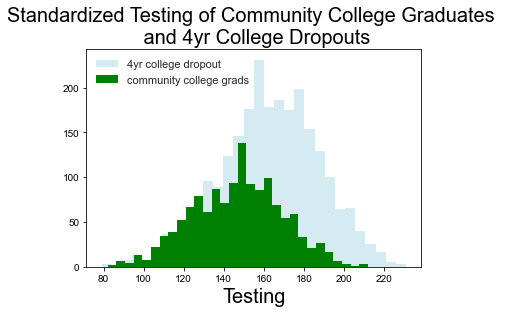

In [15]:
#plt.hist(comm_y.testing, alpha= 1, bins=30, color='green')
plt.hist(coll_n.testing, alpha=.5, bins=30, color='lightblue')
plt.hist(comm_y.testing, alpha= 1, bins=30, color='green')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.xlabel('Testing', size = 20)
plt.style.use('seaborn-whitegrid')
sns.set(style = "white")
#plt.savefig('testing2.png', bbox_inches='tight')
plt.title('Standardized Testing of Community College Graduates \n and 4yr College Dropouts', size = 20)
plt.legend(['4yr college dropout','community college grads'], loc = 2)
plt.show()

Surprising to see such a difference in standardized testing of 4 yr college dropouts and commmunity college graduates.  Next I want to look at the standardized testing of college graduates relative to dropouts.  

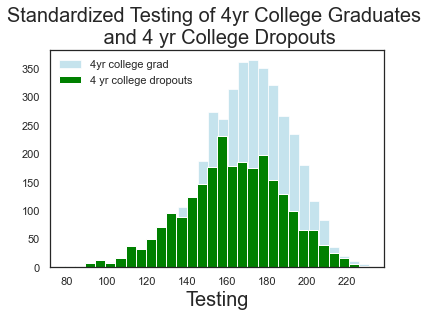

In [16]:
plt.hist(coll_y.testing, alpha = .7, bins=30, color='lightblue')
plt.hist(coll_n.testing, alpha = 1, bins=30, color='green')
plt.xlabel('Testing', size = 20)
#plt.savefig('testing2.png', bbox_inches='tight')
plt.title('Standardized Testing of 4yr College Graduates \n and 4 yr College Dropouts', size = 20)
plt.legend(['4yr college grad','4 yr college dropouts'])
plt.show()

Note the increased variance of dropouts relative to graduates.  The mean of dropouts is lower that college completers but people are dropping out at all level of standardized testing.   There is more to college completion than standardized test scores.  

In [17]:
print(f'mean wages for 4yr college graduates: {round(coll_y.wages_cont.mean())}')
print(f'mean wages for 4yr college drop outs: {round(coll_n.wages_cont.mean())}')
print(f'mean wages for commmunity college graduates: {round(comm_y.wages_cont.mean())}')
print(f'mean wages for community college drop outs: {round(comm_n.wages_cont.mean())}')

mean wages for 4yr college graduates: 5897556.0
mean wages for 4yr college drop outs: 4054904.0
mean wages for commmunity college graduates: 3935624.0
mean wages for community college drop outs: 3093576.0


Note that these quantities are not in dollars as 'wages_cont' is wage data multiplied by standardized testing. Surprising to see community college graduates making comparable wages to 4 yr college drop outs.  Would like to explore earninsg of community college students with college level standardized testing but that opted for community college instead.  Would speculate that the earnings of a high iq community college educated gorup would be superior to a 4yr college dropouts of similiar iq.  This comparision would serve help quantify the actual value of the community college credential.  These kinds of assesments of ROI of credentials will have to wait for another itereation of the project.  

In [18]:
plt.style.use('seaborn-ticks')
sns.set_style("white")

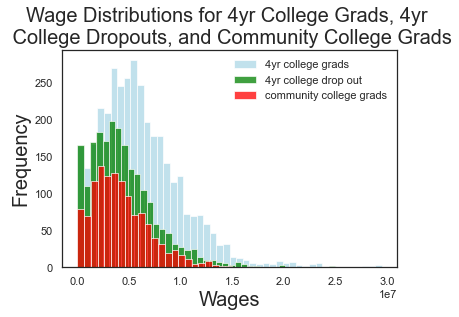

In [19]:
p = coll_y[(coll_y.wages_cont > 0) & (coll_y.wages_cont < 30000000)]
q = coll_n[(coll_n.wages_cont > 0) & (coll_n.wages_cont < 30000000)]
r = comm_y[(comm_y.wages_cont > 0) & (comm_y.wages_cont < 30000000)]

sns.histplot(p['wages_cont'],color = 'lightblue',label='4yr college grad')
sns.histplot(q['wages_cont'],color = 'green', label='4yr college drop out')
sns.histplot(r['wages_cont'], color = 'red',label='community college grad')
plt.title('Wage Distributions for 4yr College Grads, 4yr \n College Dropouts, and Community College Grads',size = 20)
plt.legend(['4yr college grads','4yr college drop out','community college grads'])
plt.xlabel('Wages',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show()

wage distributions for 4yr college grad, 4yr college drop out, community college grads.  Note distributinos for communitys college grads and 4 yr college dropout are remarkably congruent.

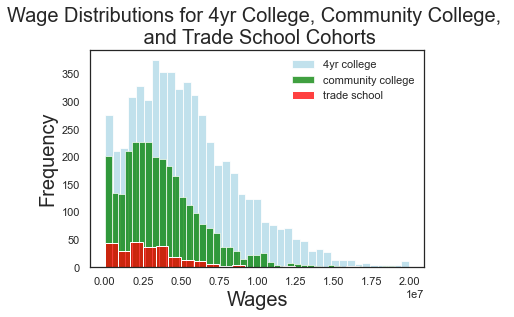

In [20]:
p = coll_t[(coll_t.wages_cont > 0) & (coll_t.wages_cont < 20000000)]
q = comm_t[(comm_t.wages_cont > 0) & (comm_t.wages_cont < 20000000)]
r = trade_t[(trade_t.wages_cont > 0) & (trade_t.wages_cont < 20000000)]

sns.histplot(p['wages_cont'],  color = 'lightblue',label='4yr college grad')
sns.histplot(q['wages_cont'],  color = 'green', label='4yr college drop out')
sns.histplot(r['wages_cont'],  color = 'red',label='community college grad')
plt.title('Wage Distributions for 4yr College, Community College, \n and Trade School Cohorts', size = 20)
plt.legend(['4yr college','community college','trade school'])
plt.xlabel('Wages',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show()

Comparision between wages of the three main cohorts (4yr college, community college, trade school)with outliers removed.

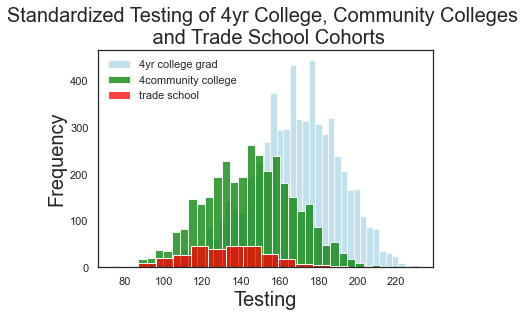

In [21]:
p = coll_t[coll_t.testing > 0]
q = comm_t[comm_t.testing > 0]
r = trade_t[trade_t.testing > 0]
sns.histplot(p['testing'],  color = 'lightblue',label='yes')
sns.histplot(q['testing'],  color = 'green', label='tot')
sns.histplot(r['testing'],  color = 'red',label='no')
plt.title('Standardized Testing of 4yr College, Community Colleges \n and Trade School Cohorts', size = 20)
plt.legend(['4yr college grad','4community college','trade school'])
plt.xlabel('Testing',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show()

standardized testing differences among post secondary cohorts more severe than expected.  

academic performance between cohorts

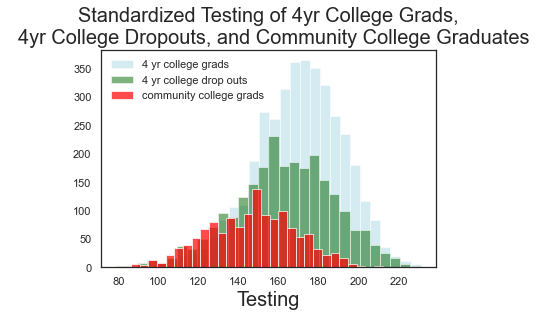

In [22]:
plt.hist(coll_y.testing, alpha=0.5, bins=30, color='lightblue')
plt.hist(coll_n.testing, alpha=0.5, bins=30, color='darkgreen')
plt.hist(comm_y.testing, alpha=.7, bins=30, color='red')

plt.title('Standardized Testing of 4yr College Grads,\n  4yr College Dropouts, and Community College Graduates', size = 20)
plt.xlabel('Testing', size = 20 )
#plt.savefig('testing2.png', bbox_inches='tight')
plt.legend(['4 yr college grads', '4 yr college drop outs','community college grads'])
plt.show()

Test scores between college grads and drop outs too close to be useful in classification modelling.  For the classification task of distinguishing college grads from dropouts other factors, beyond inelligence are involved.  

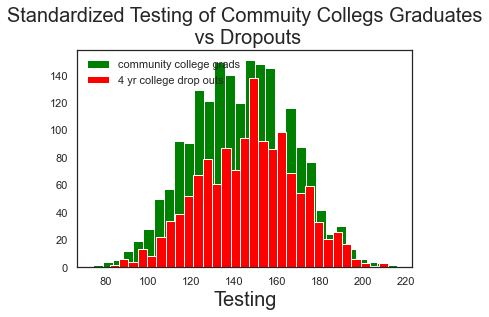

In [23]:
plt.hist(comm_n.testing, alpha=1, bins=30, color='green')
plt.hist(comm_y.testing, alpha=1, bins=30, color='red')
plt.title('Standardized Testing of Commuity Collegs Graduates\n vs Dropouts', size = 20)
plt.xlabel('Testing', size = 20)
#plt.savefig('testing2.png', bbox_inches='tight')
plt.legend(['community college grads', '4 yr college drop outs'], loc = 2)
plt.show()

In [24]:
print(round(comm_n.testing.mean()))
print(round(comm_y.testing.mean()))

143.0
147.0


standardized testing of community college graduates and drop outs too close to be the lone factor in success.

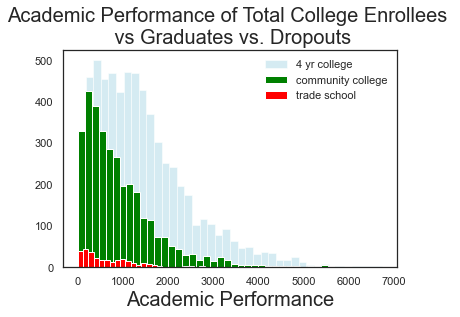

In [25]:
plt.hist(coll_t.academic_p, alpha= .5, bins=40, color='lightblue')
plt.hist(comm_t.academic_p, alpha= 1, bins=40, color='green')
plt.hist(trade_t.academic_p, alpha= 1, bins=40, color='red')
plt.title('Academic Performance of Total College Enrollees \n vs Graduates vs. Dropouts', size = 20)
plt.xlabel('Academic Performance', size = 20)
plt.legend(['4 yr college','community college','trade school'])
#plt.savefig('academics.png', bbox_inches='tight')
plt.show()

Comparisons of academic performance.  'academic_p' is a feature engineered by me that is the product of homework time spent per week x total number of academic credit hours taken in high schoool x high schoool GPA.  These comparisions are as expected.

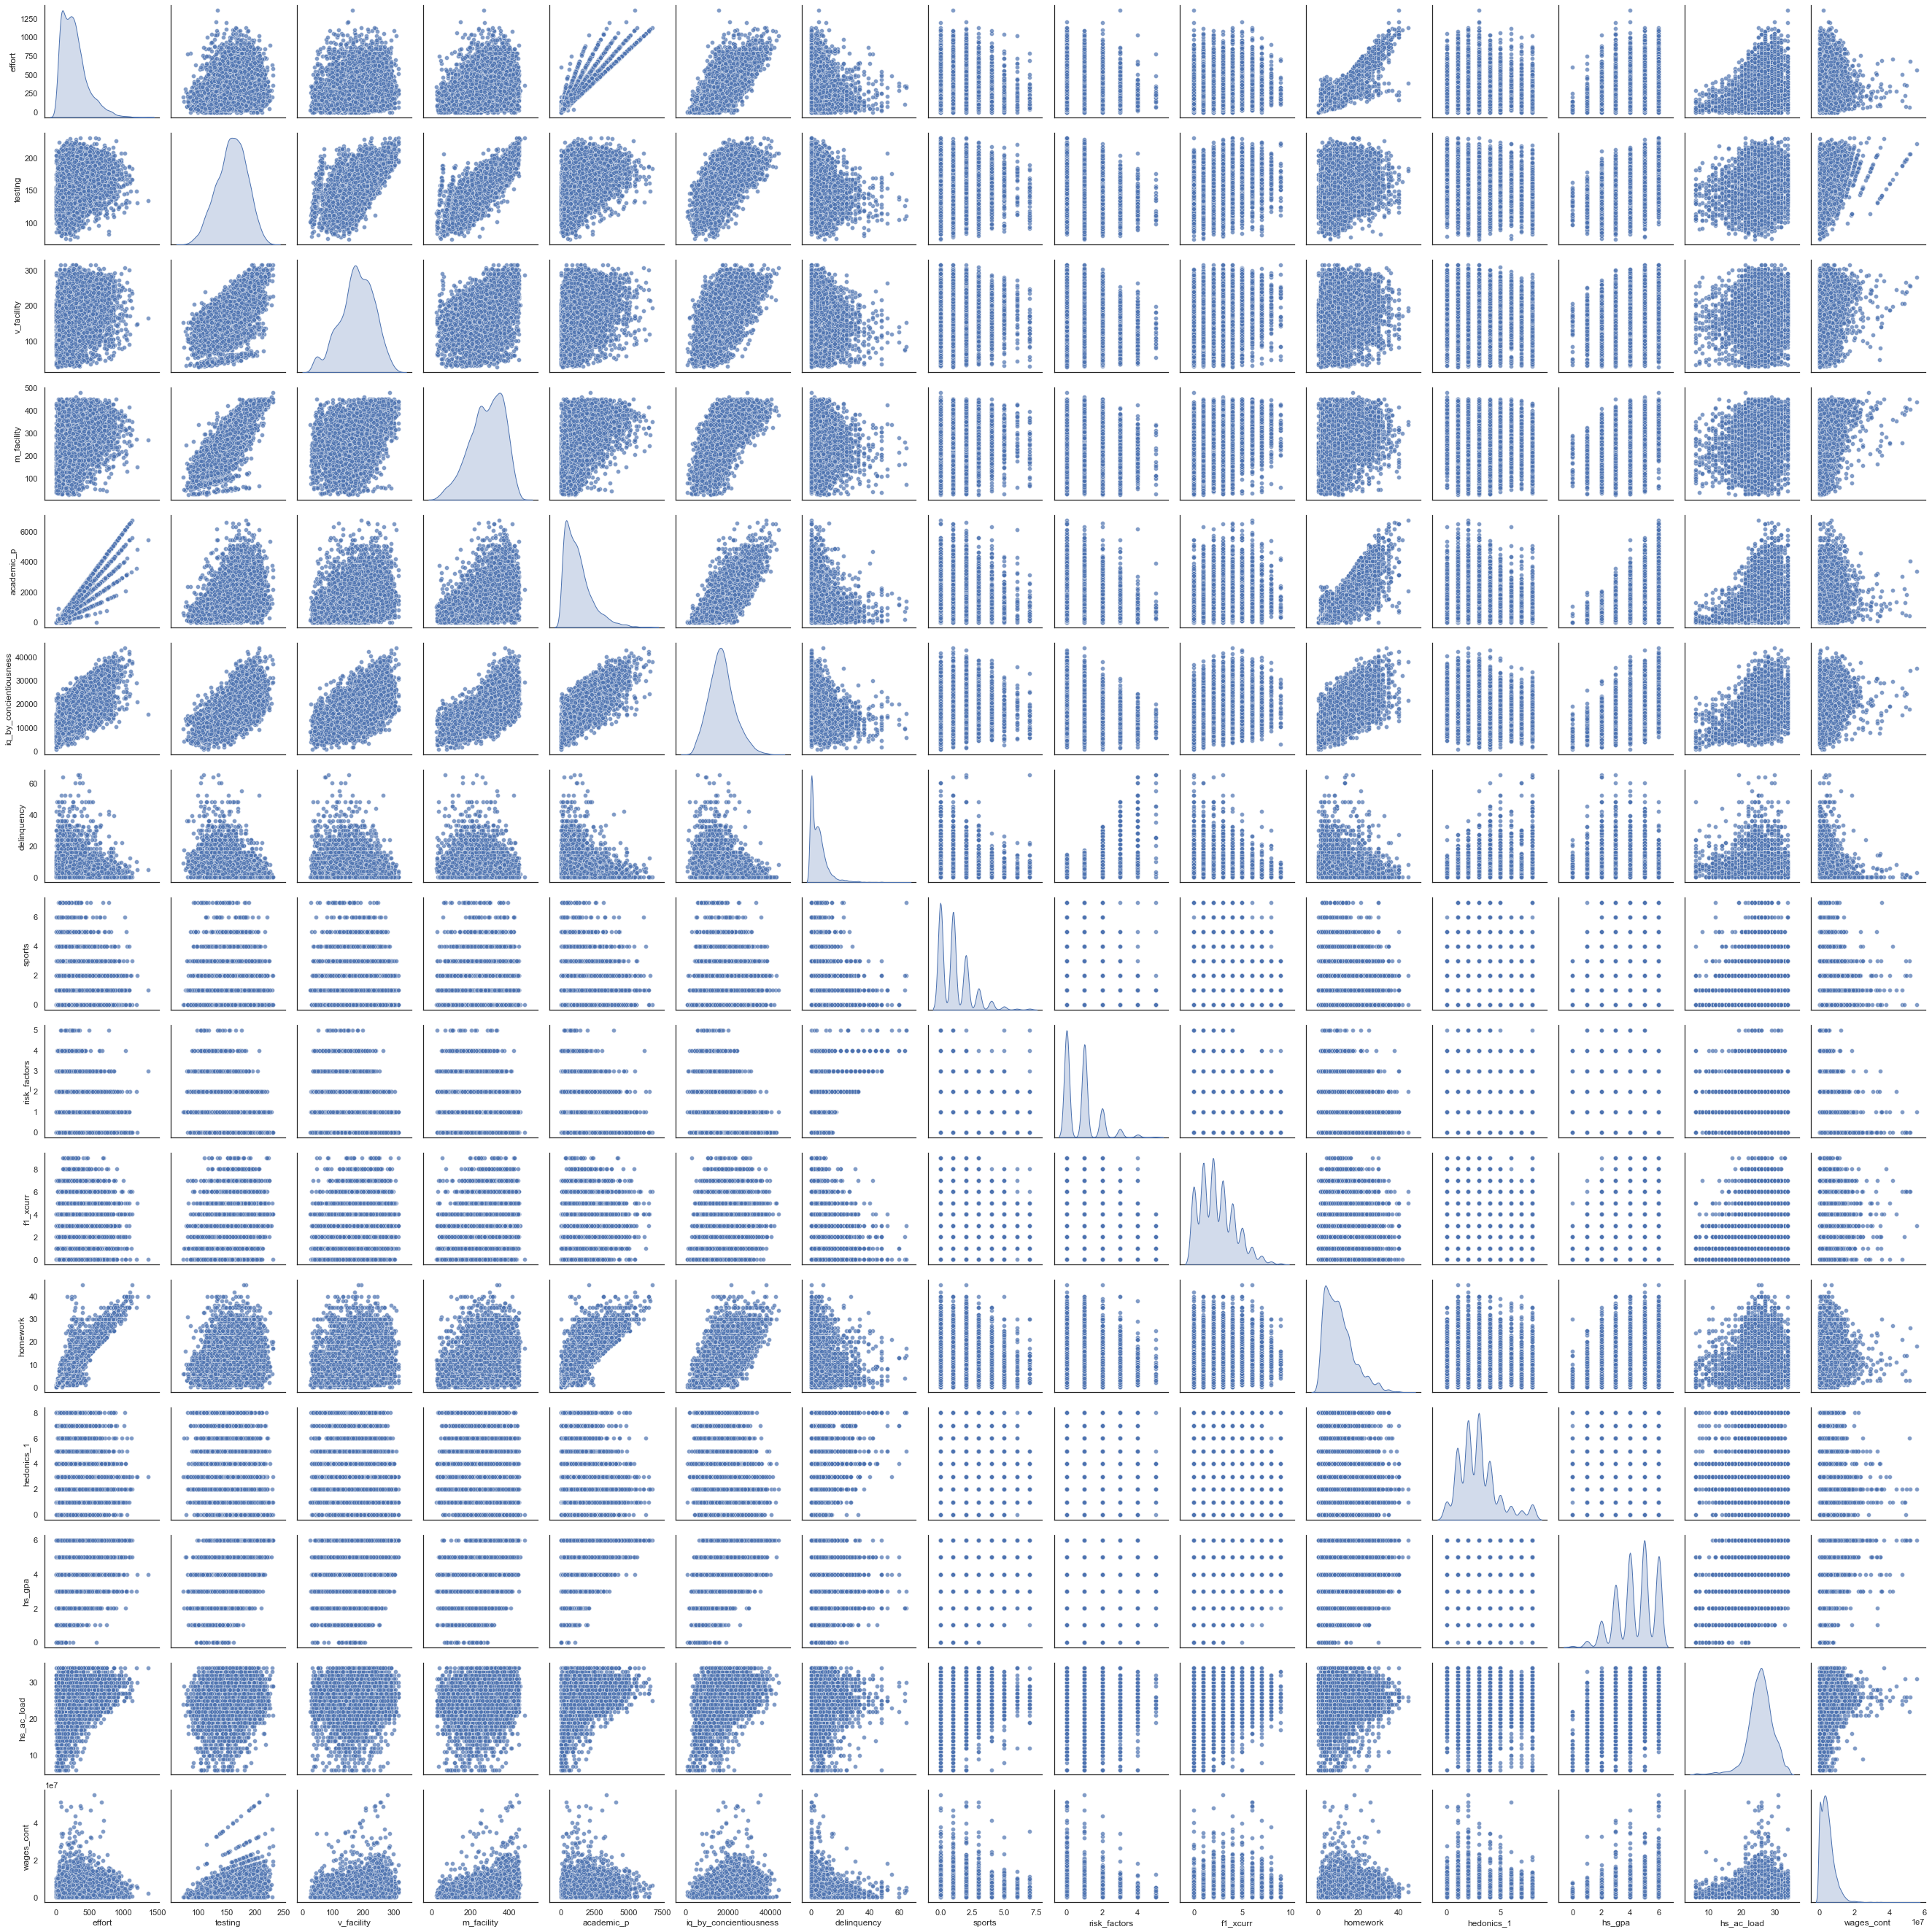

In [26]:
features = exp[[ 'effort', 'testing', 'v_facility',
       'm_facility', 'academic_p', 'iq_by_concientiousness',
                'delinquency','sports','risk_factors','f1_xcurr','homework',
                'hedonics_1','hs_gpa','hs_ac_load','wages_cont']]

sns.pairplot(features, diag_kind = 'kde', palette= 'coolwarm', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

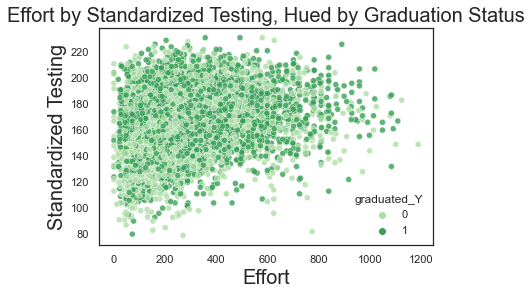

In [27]:
sns.scatterplot(x = 'effort',
                y = 'testing',
                data = coll_t,
                alpha = .8,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
plt.xlabel('Effort', size = 20)
plt.ylabel('Standardized Testing', size = 20)
plt.title('Effort by Standardized Testing, Hued by Graduation Status', size = 20)
plt.savefig('scatterwages.png', bbox_inches='tight')
plt.show()

Note that darker green is distributed more or less evenly indicating that 'effort' feature is not hugely relevant to graduation status, but higher levels of 'effort' have some relevance to standardized testing as indictated by plot

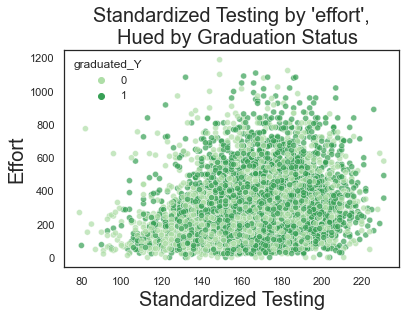

In [28]:
sns.scatterplot(x = 'testing', 
                y = 'effort',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.title('Standardized Testing by \'effort\',\n  Hued by Graduation Status', size = 20)
plt.xlabel('Standardized Testing', size = 20)
plt.ylabel('Effort', size = 20)
plt.show()

'effort' is the product of high school academics load and stated timme spent on homework per week.  darker green indicates graduation from 4 yr college.  Seems to be a high effort output correlates with higher standardized testing. 

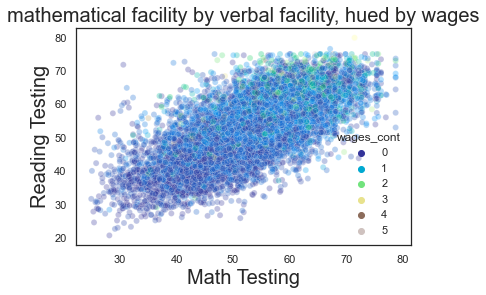

In [29]:
sns.scatterplot(x = 'reading_b', 
                y = 'math_1',
                data = exp,
                alpha = .3,
                hue = 'wages_cont',
                palette = 'terrain'           
               )
plt.title('mathematical facility by verbal facility, hued by wages', size = 20)
plt.xlabel('Math Testing', size = 20)
plt.ylabel('Reading Testing', size = 20)
plt.savefig('m_r_conf.png', bbox_inches='tight')
plt.show()

Earnings, verbal ability and mathematical ability positively correlated.

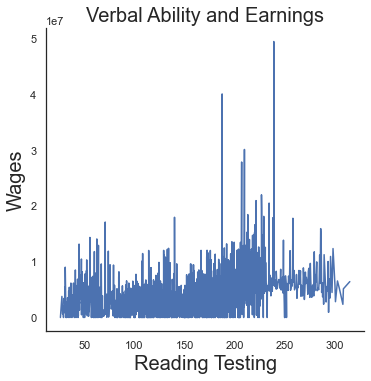

In [30]:
sns.relplot(x="v_facility", y="wages_cont", ci=None, kind="line", data=exp)
plt.xlabel('Reading Testing', size = 20)
plt.ylabel('Wages', size = 20)
plt.title('Verbal Ability and Earnings',size = 20)
plt.show()

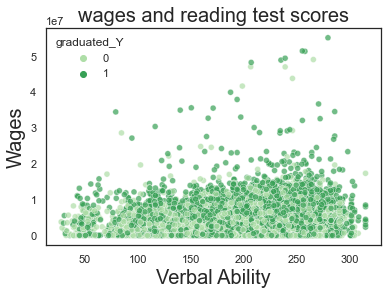

In [31]:
sns.scatterplot(x = 'v_facility', 
                y = 'wages_cont',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
#plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.xlabel('Verbal Ability', size = 20)
plt.ylabel('Wages', size = 20)
plt.title('wages and reading test scores', size = 20)
plt.show()

Note wages that extreme ranges of mathematical ability vs. verbal ability.   Math ability seems to provide better prospects in terms of earnings than verbal.  High verbal metrics do not suport high wage outcomes as well as high math metrics.

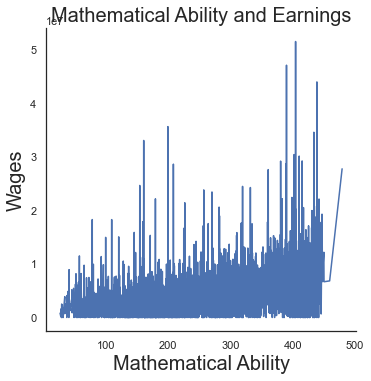

In [32]:
sns.relplot(x="m_facility", y="wages_cont", ci=None, kind="line", data=exp)
plt.xlabel('Mathematical Ability', size = 20)
plt.ylabel('Wages', size = 20)
plt.title('Mathematical Ability and Earnings',size = 20)
plt.show()

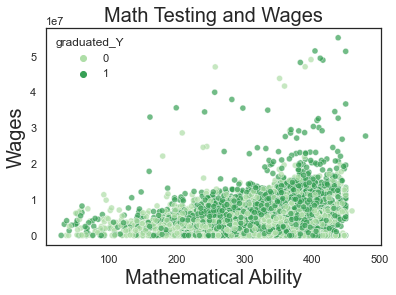

In [33]:
sns.scatterplot(x = 'm_facility', 
                y = 'wages_cont',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
#plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.xlabel('Mathematical Ability', size = 20)
plt.ylabel('Wages', size = 20)
plt.title('Math Testing and Wages', size = 20)
plt.show()

Note more distinct upward slope to distribution with dark green points denoting graduation concetrated to the right and extreme high earners occuring almost exclusively at the high end of math ability.

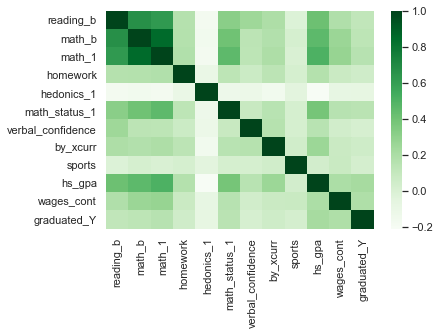

In [34]:
corr_features = coll_t[['reading_b','math_b','math_1','homework','hedonics_1','math_status_1',
                     'verbal_confidence','by_xcurr','sports','hs_gpa','wages_cont','graduated_Y']]

cor_matrix = corr_features.corr()
sns.heatmap(cor_matrix, cmap = 'Greens')
plt.show()

math and reading standardized test score highly correlated.  'hs_gpa', 'math_status','math_b','math_1','reading_b' higher correlation to 'graduation_Y".  Hedonic behavior mildly negatively correlated with graduation from college.

In [35]:
def plotbar(x,y,data, save = False):
    sns.barplot(x = x,
            y = y,
            data = data,
            palette = 'Greens');
    if save == True:
        plt.savefig(f'{x}-{y}-{data}.png', bbox_inches='tight')  
    plt.show()
    return

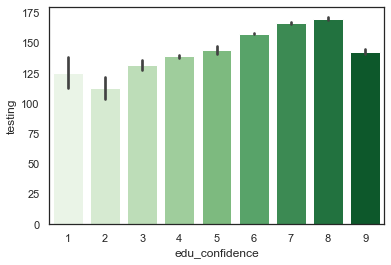

In [36]:
plotbar('edu_confidence','testing',exp)

positive relationship between educational confidence and standardized testing

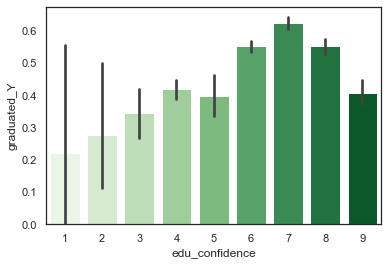

In [37]:
plotbar('edu_confidence','graduated_Y',exp)

positive relationship between high educaitonal confidence and graduation from a post secondary program.  Note 'graduated_Y'  is not necasssarilyt graduation from a 4yr school but graduation from 4yr college, community college, or trade school.

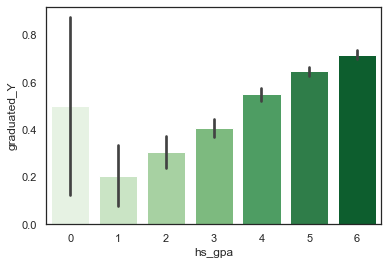

In [38]:
plotbar('hs_gpa','graduated_Y',coll_t)

Relationship between hs_gpa and four year college graduation

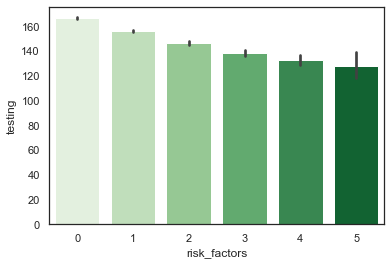

In [39]:
plotbar('risk_factors','testing',exp)

 risk factors and lower standardized testing related

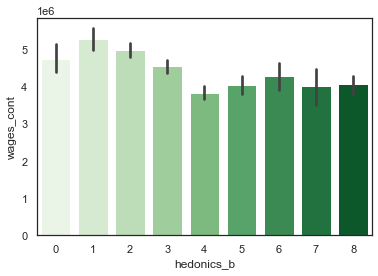

In [40]:
plotbar('hedonics_b','wages_cont',exp)

Wages tend to be higher the less time spent on tv/movies/video games.  Note that the numbers correspond to hours estimated spent on these activities per day and is an original feature of the study.

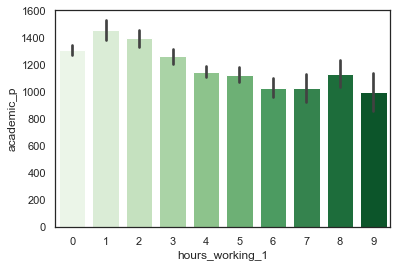

In [41]:
plotbar('hours_working_1','academic_p',exp)

hours spent working in high school compromises academic performance.  

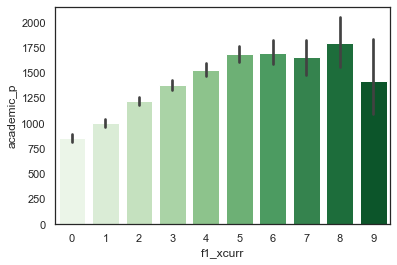

In [42]:
plotbar('f1_xcurr','academic_p',exp)

Extra curricular activities positively related to 'academic_p'

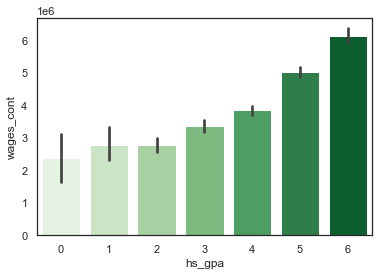

In [43]:
plotbar('hs_gpa','wages_cont', exp)

Higher gpa, higher wages.  note higher bump in wage data at the extreme end of gpa.  

In [44]:
exp.groupby('literacy_home').testing.mean()

literacy_home
0    143.990854
1    151.663487
2    154.992227
3    164.111872
Name: testing, dtype: float64

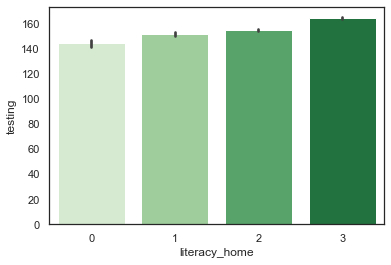

In [45]:
plotbar('literacy_home','testing',exp)

Definite mild, but positive relationship between the literacy resources in home environment and standardized testing.  Whether this is causal or correlative is unknown.  Note the study defines 'literacy_home' as having more than 50 books present, magazine subscription, or news paper subscription.  The number corresponds to how many of these are present in the home. 

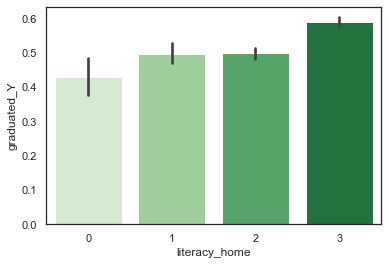

In [46]:
plotbar('literacy_home','graduated_Y',exp)

Graduation status from a post secondary program related to literacy resources in home environment.  

In [47]:
exp.literacy_home.value_counts(normalize = True)

3    0.486618
2    0.363802
1    0.116453
0    0.033128
Name: literacy_home, dtype: float64

Almost 50% of households have 3 literacy resources, a third with 2, and t

higher level of math classes complete in high school major benefit for college graduation and a major benefit for performance in wage earning

In [ ]:
plotbar('math_status_1','wages_cont',exp)

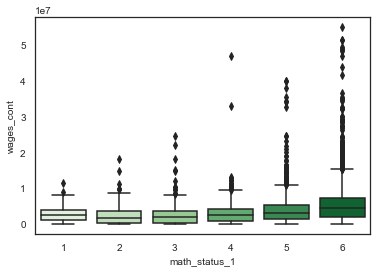

In [243]:
sns.boxplot(x = 'math_status_1', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

note high number of outliers with regard to high level of math class completion

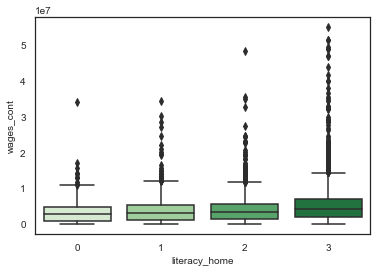

In [244]:
sns.boxplot(x = 'literacy_home', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

a highly literate home environment tends to suggest higher economic performance as well.

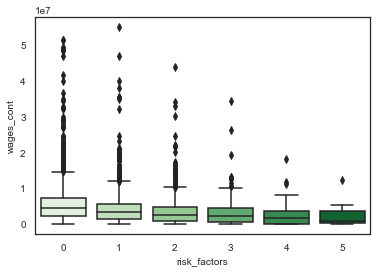

In [245]:
sns.boxplot(x = 'risk_factors', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.savefig('risk.png', bbox_inches='tight')
plt.show()

risk factors like broken home, poverty, low educaiton levels of parents, or frequent school changes suggest lower economic performance

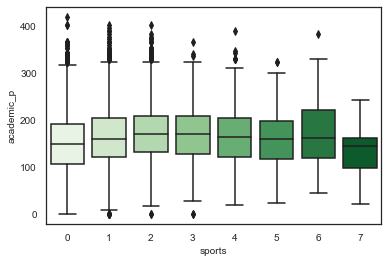

In [246]:
sns.boxplot(x = 'sports', y = 'academic_p',
           data = exp,
           palette = 'Greens')
plt.show()

sport seems to have a sweet spot around '2' for performing academically

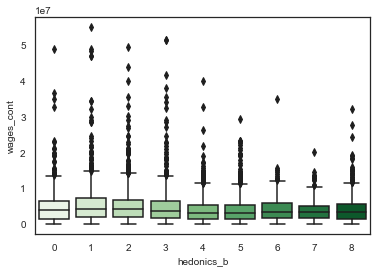

In [247]:
sns.boxplot(x = 'hedonics_b', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.show()

high levels of media usage tends to compromise earning outcomes.  what does the increased number of earnings outliers at '8' mean? 

In [248]:
exp.hedonics_b.value_counts(normalize = True)

3    0.212403
2    0.187658
4    0.162004
1    0.133118
5    0.094435
8    0.085850
0    0.064943
6    0.040501
7    0.019089
Name: hedonics_b, dtype: float64

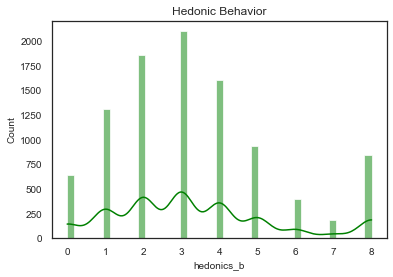

In [249]:
sns.histplot(exp.hedonics_b, color = 'green', kde = True)
plt.title('Hedonic Behavior')
plt.show()

are the increased outliers just an side effect of more people in that category?  poss.

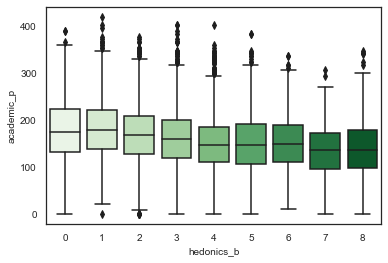

In [250]:
sns.boxplot(x = 'hedonics_b', y = 'academic_p',
           data = exp,
           palette = 'Greens')
plt.show()

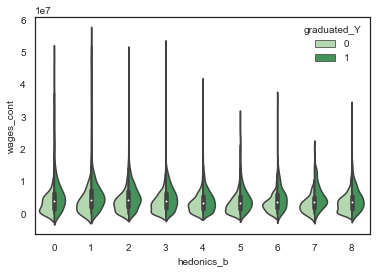

In [251]:
x = sns.violinplot(x="testing", y="wages_cont", hue="graduated_Y",
                    data=exp, palette="Greens", split=True)

notice increasing skewness at higher levels of hedonic behaviorfor graduates.  IQ become more of factor in graduation for more hedonically oriented students.

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  # This is added back by InteractiveShellApp.init_path()
/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


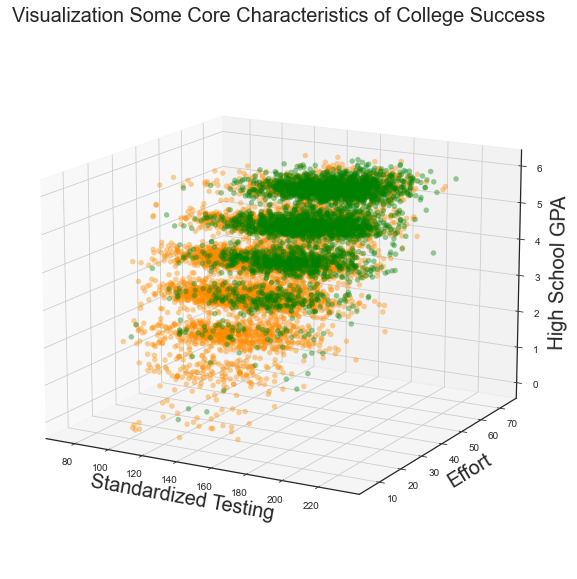

In [393]:
y_grad = exp[(exp.ps_level ==1) & (exp.graduated_Y == 1)]
n_grad = exp[(exp.ps_level !=1 ) | (exp.graduated_Y != 1)]

data = (y_grad, n_grad)
colors = ('green', 'darkorange')
groups = ('college grad', 'not grad') 

fig = plt.figure(figsize = (15, 10))

ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
# ax.set_proj_type('ortho')

for data, color, group in zip(data, colors, groups):
    x, y, z = data.testing, data.effort, data.hs_gpa
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30, label=group)
# x, y, z = data.testing, data.effort, data.hs_ac_load
# ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30, label=group)

ax.set_xlabel('Standardized Testing',size = 20)
ax.set_ylabel('Effort',size = 20)
ax.set_zlabel('High School GPA',size = 20)
plt.title('Visualization Some Core Characteristics of College Success',size = 20)
#plt.savefig('3dcharacteristics.png', bbox_inches='tight')
ax.view_init(15, 0)
plt.draw()
plt.pause(.001)


succesful modelling will parse the green points from the orange. higher high school GPA, higher standardized testing, and higher effort visually reveal the green 4yr college graduate cohort.  Stratifications on high school GPA axis reflect how the study grouped GPA data.  

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if sys.path[0] == '':
/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


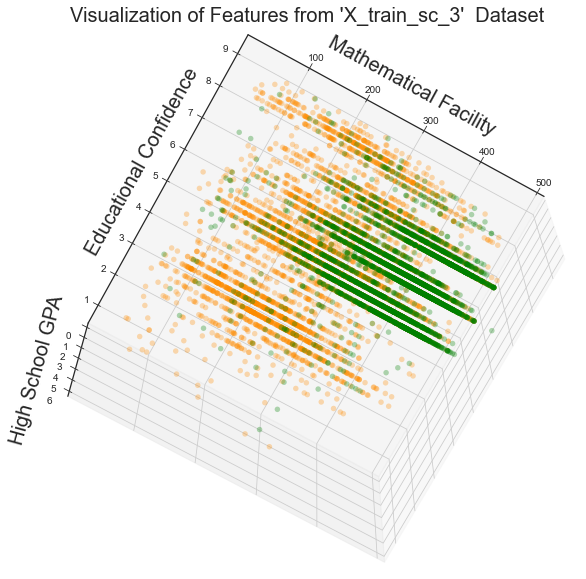

In [392]:
y_grad = exp[(exp.ps_level ==1) & (exp.graduated_Y == 1)]
n_grad = exp[(exp.ps_level !=1 ) | (exp.graduated_Y != 1)]

data = (y_grad, n_grad)
colors = ('green', 'darkorange')
groups = ('college grad', 'not grad') 

# Create plot
fig = plt.figure(figsize = (15, 10))

ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
# ax.set_proj_type('ortho')

for data, color, group in zip(data, colors, groups):
    x, y, z = data.m_facility, data.edu_confidence, data.hs_gpa
    ax.scatter(x, y, z, alpha=0.3, c=color, edgecolors='none', s=30, label=group)
# x, y, z = data.testing, data.effort, data.hs_ac_load
# ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30, label=group)


ax.set_xlabel('Mathematical Facility',size = 20)
ax.set_ylabel('Educational Confidence',size = 20)
ax.set_zlabel('High School GPA',size = 20)
plt.title('Visualization of Features from \'X_train_sc_3\'  Dataset',size = 20)
#plt.savefig('3d_X_train_sc_3.png', bbox_inches='tight')

ax.view_init(105, 0)
plt.draw()
plt.pause(.001)    
#plt.savefig('3d_X_train_sc_3.png', bbox_inches='tight')
# plt.ion()

This is the 3 features identified from the feature importances of the first random forest model.  visualizaation depicts higher mathematical facility, higher educational conffidence, and higher academic performance as revealing the green or 4yr college graduation status.  